In [9]:
from pandas import read_csv
from matplotlib import pyplot
import collections

In [8]:
# define the dataset location
filename = './data/german.csv'
# load the csv file as a data frame
dataframe = read_csv(filename, header=None)
# summarize the shape of the dataset
print(dataframe.shape)
# Count classes
target = dataframe.values[:,-1]
counter = collections.Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

(1000, 21)
Class=1, Count=700, Percentage=70.000%
Class=2, Count=300, Percentage=30.000%


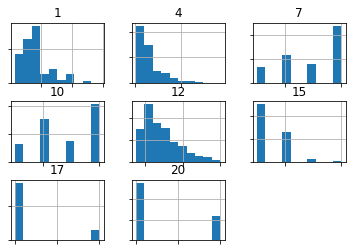

In [10]:
# select columns with numerical data types
num_ix = dataframe.select_dtypes(include=['int64', 'float64']).columns
# select a subset of the dataframe with the chosen columns
subset = dataframe[num_ix]
# create a histogram plot of each numeric variable
ax = subset.hist()
# disable axis labels to avoid the clutter
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
# show the plot
pyplot.show()

In [12]:
# test harness and baseline model evaluation for the german credit dataset
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None)
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    # one hot encode cat features only
    ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
    X = ct.fit_transform(X)
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X, y

# calculate f2 score
def f2(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(f2)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

# define the location of the dataset
full_path = './data/german.csv'
# load the dataset
X, y = load_dataset(full_path)
# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))
# define the reference model
model = DummyClassifier(strategy='constant', constant=1)
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean F2: %.3f (%.3f)' % (mean(scores), std(scores)))

(1000, 61) (1000,) Counter({0: 700, 1: 300})
Mean F2: 0.682 (0.000)


In [13]:
# define models to test
def get_models():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression(solver='liblinear'))
    names.append('LR')
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # NB
    models.append(GaussianNB())
    names.append('NB')
    # GPC
    models.append(GaussianProcessClassifier())
    names.append('GPC')
    # SVM
    models.append(SVC(gamma='scale'))
    names.append('SVM')
    return models, names